# Predict Test Scores of students


This notebook is a work flow for various Python-based machine learning model for predicting test scores of students.

Going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Model Evaluation

# 1. Problem Definition

Given the set of parameters, can we predict a test score of a student?

# 2. Data

Predicting the posttest scores of students from 11 features by Kwadwo Ofosu

Source: https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students

# 3. Evalutation

Creating a Regression Model that we will evalute using the Root Mean Square Error (RMSE), R2 Score and Mean Absolute Error (MAE)

# 4. Features

It contains information about a test written by some students. It include features such as: School setting, School type, gender, pretetest scores among others.

## Features / inputs

    1. school - Name of the school the student is enrolled in.
    2. school_settings - The location of the school
    3. school_type - The type of school. Either public or non-public
    4. classroom - The type of classroom
    5. teaching_method - Teaching methods: Either experimental or Standard
    6. n_student - Number of students in the class
    7. student_id - A unique ID for each student
    8. gender - The gender of the students: male or female
    9. lunch - Whether a student qualifies for free/subsidized lunch or not
    10. pretest - The pretest score of the students out of 100

## Label / Output
    11. posttest - The posttest scores of the students out of 100

## Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Self-Projects/Predict Test Scores of students/Data/test_scores.csv')
df = pd.read_csv('test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


## Data Exploration (Exploratory Data Analysis (EDA) )

In [5]:
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [7]:
df['school'].unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

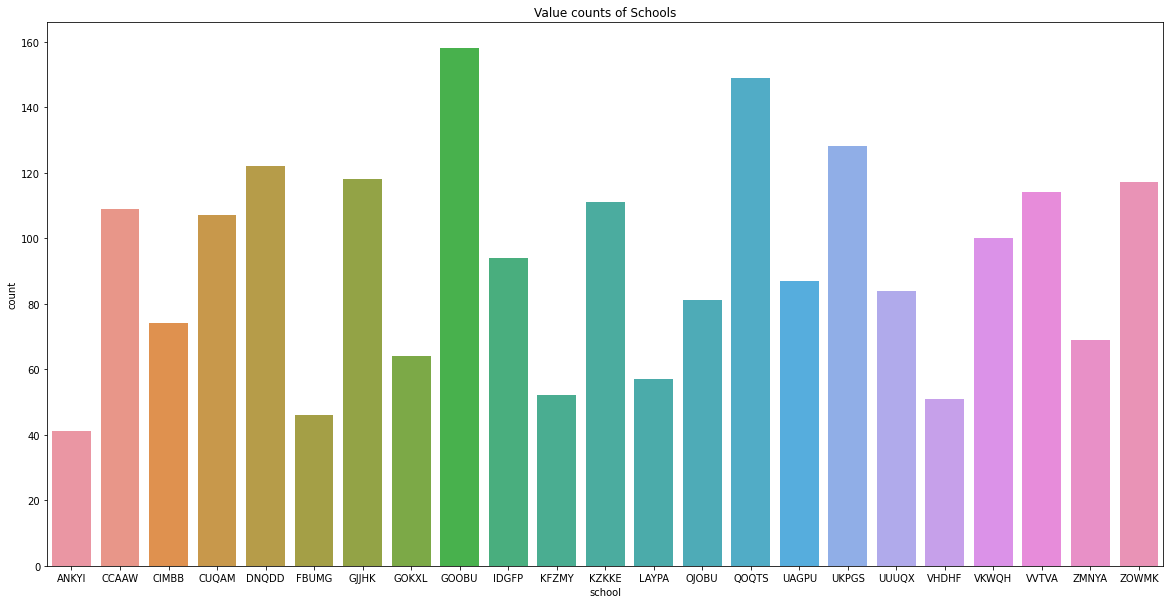

In [8]:
plt.figure(figsize=(20,10))
plt.title('Value counts of Schools')
sns.countplot(data=df, x='school');

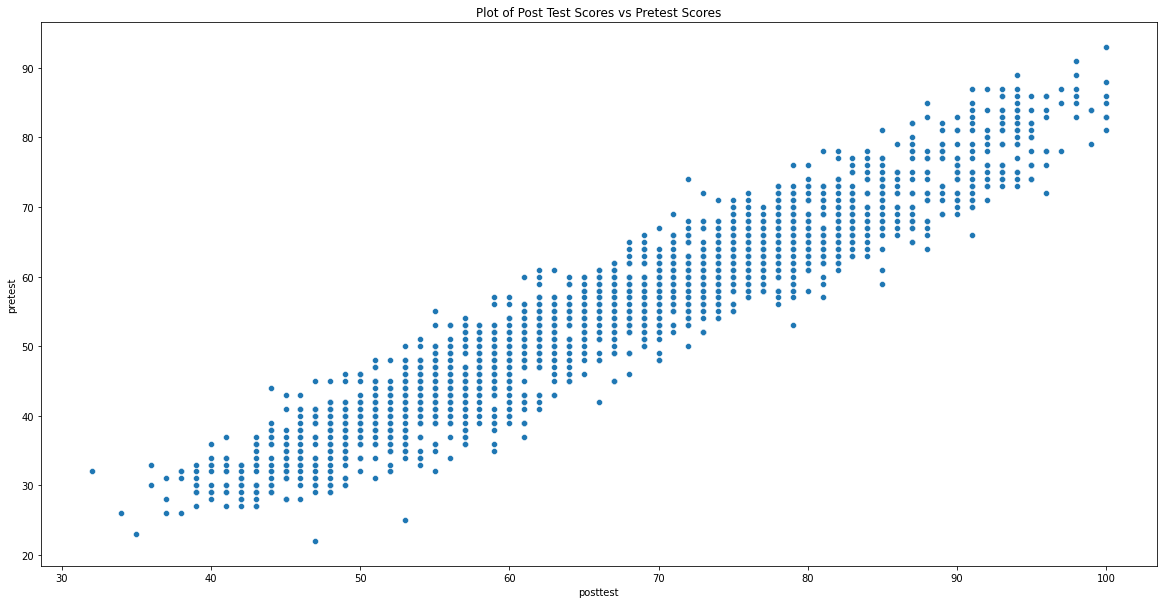

In [9]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores')
sns.scatterplot(data=df, x='posttest', y='pretest');

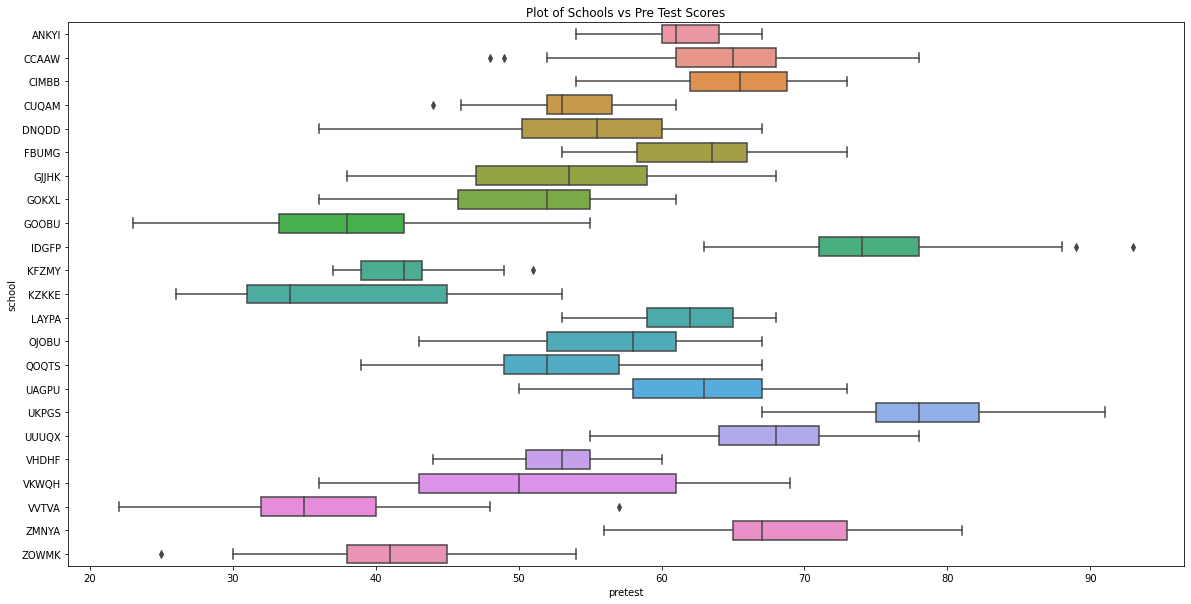

In [10]:
plt.figure(figsize=(20,10))
plt.title('Plot of Schools vs Pre Test Scores')
sns.boxplot(data=df, x='pretest', y='school');

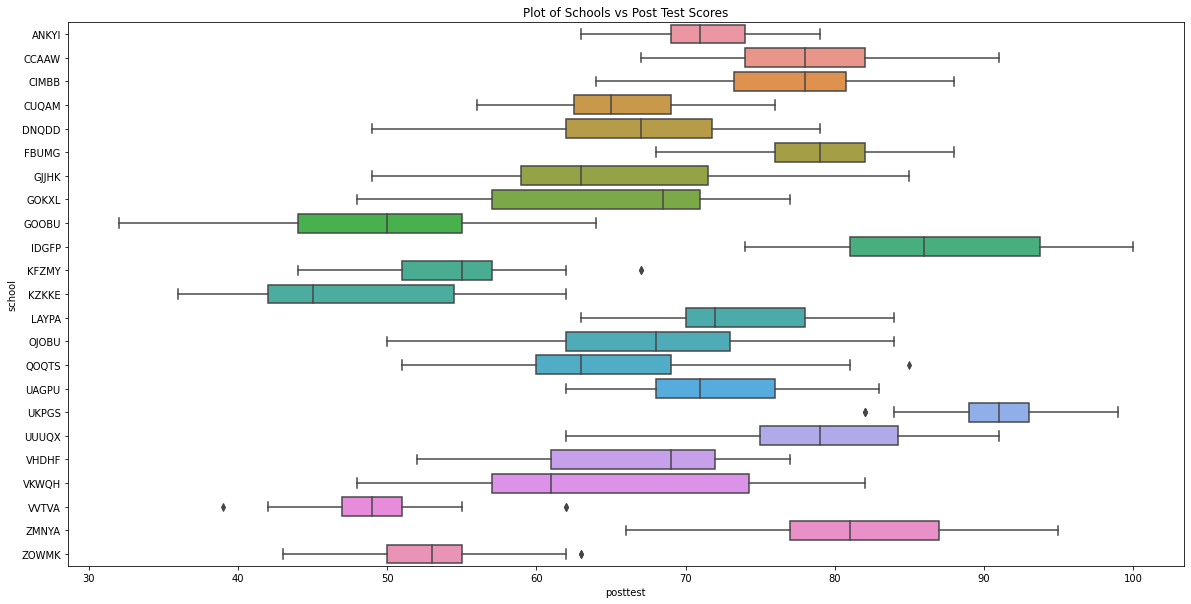

In [11]:
plt.figure(figsize=(20,10))
plt.title('Plot of Schools vs Post Test Scores')
sns.boxplot(data=df, x='posttest', y='school');

In [12]:
print(f'Mean of Pre test scores: { df["pretest"].mean() }')
print(f'Mean of Post test scores: {df["posttest"].mean()}')

Mean of Pre test scores: 54.95593061415846
Mean of Post test scores: 67.10220346929208


From the Above Bar plot and the two mean scores, we can see that students usually perfrom better at the post test scores

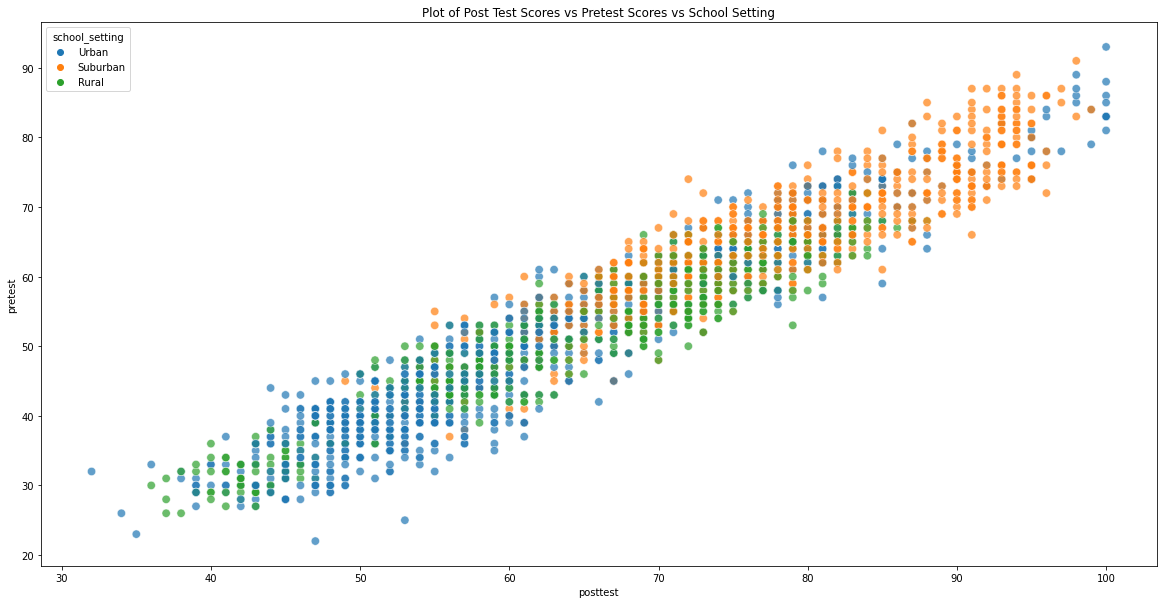

In [13]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores vs School Setting')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='school_setting', s=70, alpha=0.7);

From the plot we can see that the Urban schools and Suburban schools are more tightly in clusters then Rural Schools in term of both scores

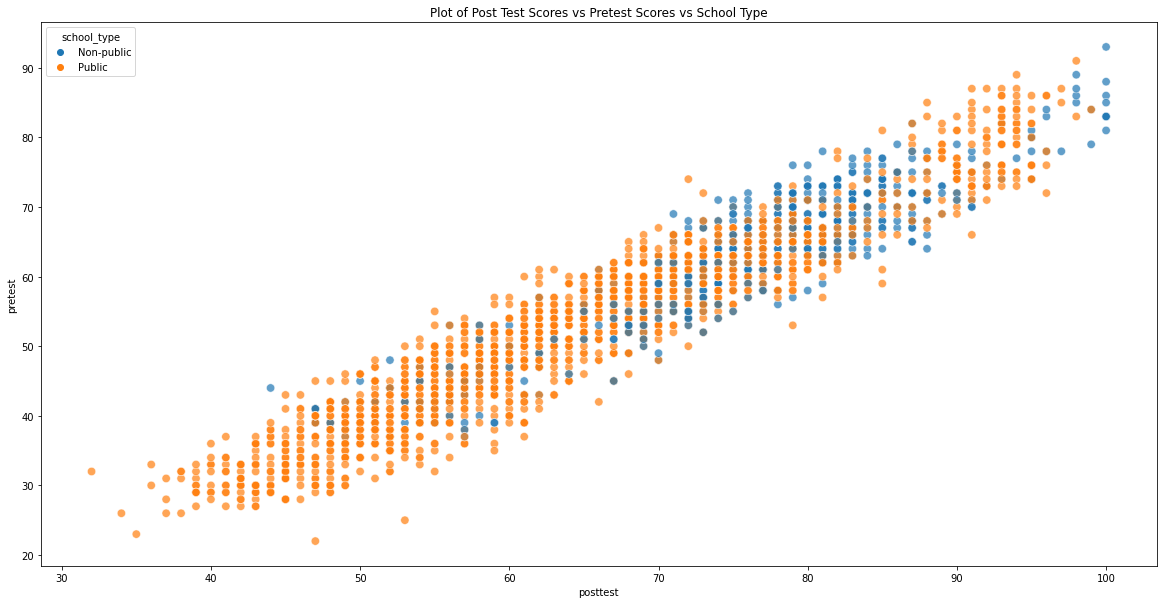

In [14]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores vs School Type')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='school_type', s=70, alpha=0.7);

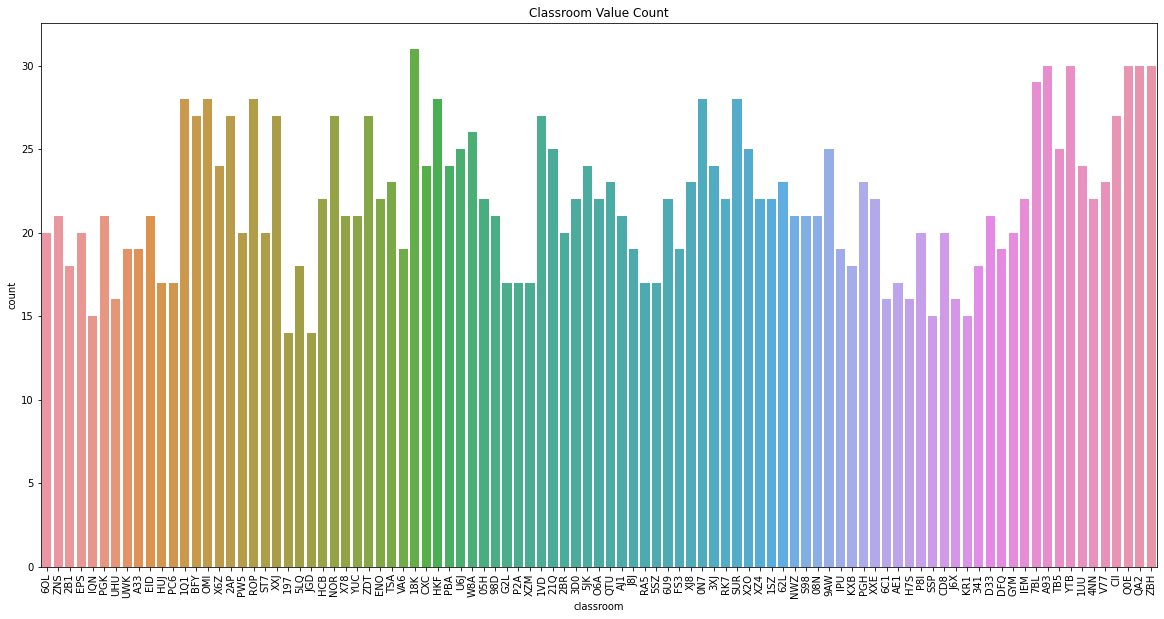

In [15]:
plt.figure(figsize=(20,10))
plt.title('Classroom Value Count')
plt.xticks(rotation=90)
sns.countplot(data=df, x='classroom');

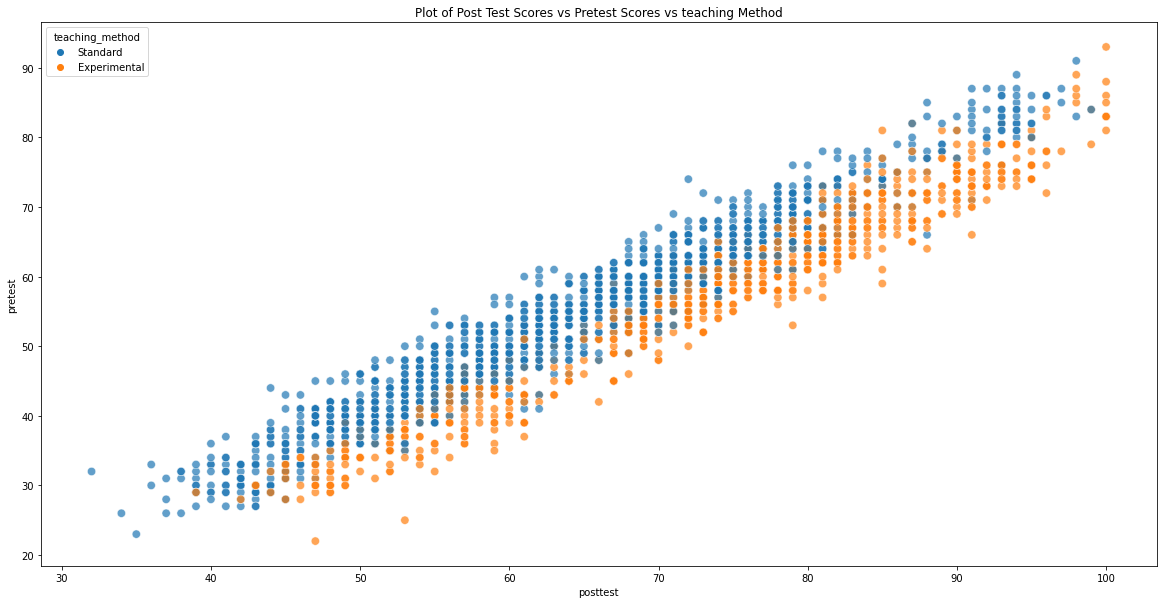

In [16]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores vs teaching Method')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='teaching_method', s=70, alpha=0.7);

This is interesting, the plot shows that usually standard teaching method is scores higher in pre test scores then Experimental teaching method.

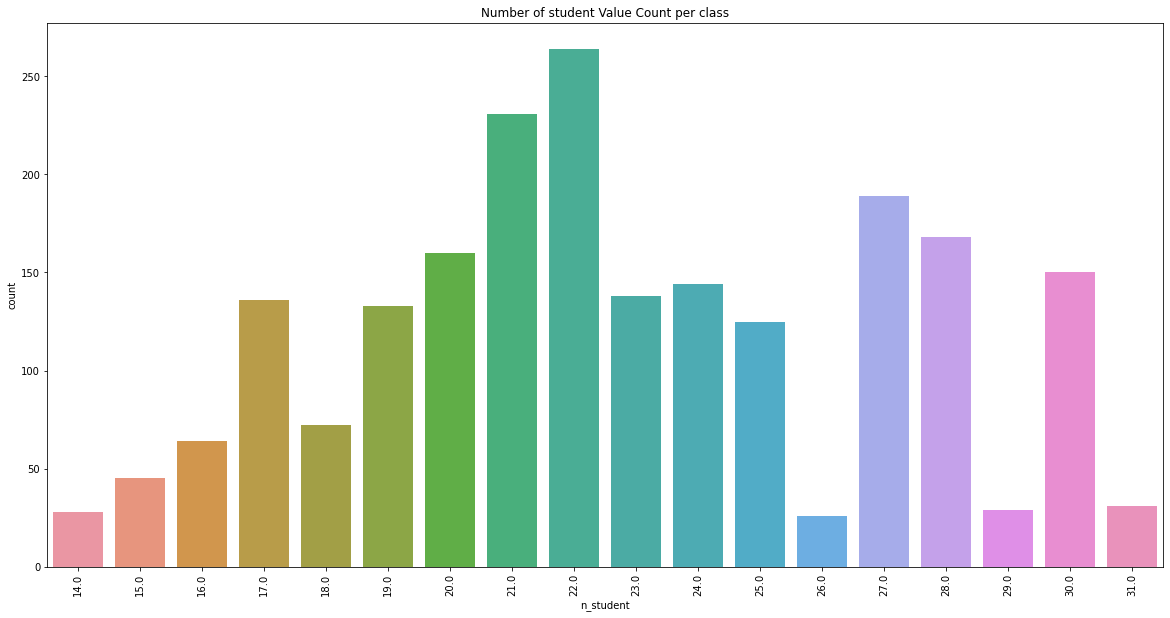

In [17]:
plt.figure(figsize=(20,10))
plt.title('Number of student Value Count per class')
plt.xticks(rotation=90)
sns.countplot(data=df, x='n_student');

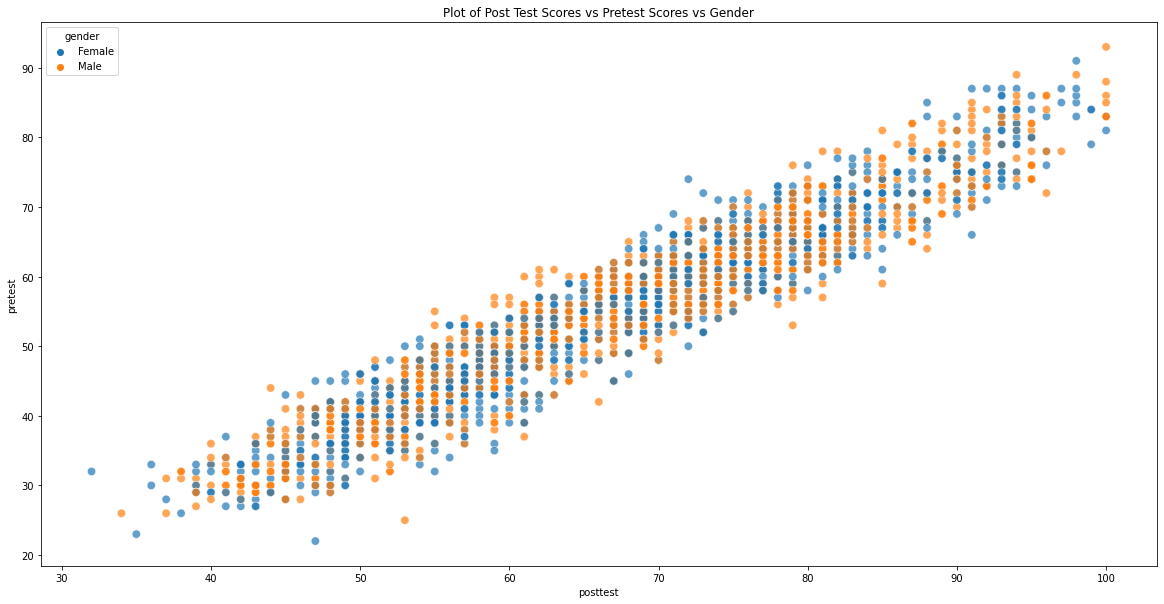

In [18]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores vs Gender')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='gender', s=70, alpha=0.7);

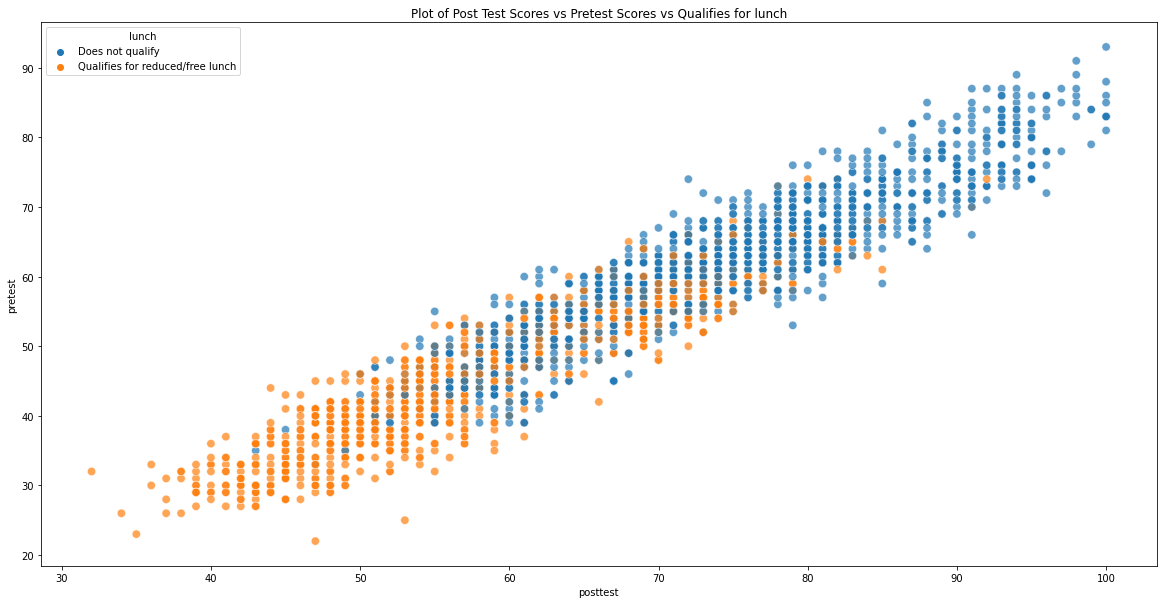

In [19]:
plt.figure(figsize=(20,10))
plt.title('Plot of Post Test Scores vs Pretest Scores vs Qualifies for lunch')
sns.scatterplot(data=df, x='posttest', y='pretest', hue='lunch', s=70, alpha=0.7);

From the plot we can see that students who Does not qualifty for lunch usually does better in both Pre test and Post test Scores

## Data cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


As student_id is unique to per student, we will be dropping it.

In [21]:
df_backup = df.copy()

In [22]:
df = df.drop('student_id', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   gender           2133 non-null   object 
 7   lunch            2133 non-null   object 
 8   pretest          2133 non-null   float64
 9   posttest         2133 non-null   float64
dtypes: float64(3), object(7)
memory usage: 166.8+ KB


### Getting Dummies Vars

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
df.head()

,n_student,pretest,posttest,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,...,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Standard,gender_Male,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20.0,66.0,79.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20.0,64.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,20.0,61.0,77.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20.0,64.0,76.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# 5. Modelling

In [26]:
X = df.drop('posttest', axis=1)
y = df['posttest']
len(X)

2133

In [27]:
print(X.shape)
print(y.shape)

(2133, 126)
(2133,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Importing Models

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [31]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Accuracy'])
    model_scores = model_scores.transpose().sort_values('Accuracy')

    return model_scores

## Baseline models and scores

In [32]:
models = {'Ridge' : Ridge(),
         'Lasso': Lasso(),
         'ElasticNet': ElasticNet(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'SVR': SVR(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor()}

In [33]:
baseline_model_scores_df = fit_and_score(models, X_train, X_test, y_train, y_test)

In [34]:
baseline_model_scores_df.sort_values('Accuracy')

,Accuracy
ElasticNet,0.883635
SVR,0.911585
DecisionTreeRegressor,0.917518
AdaBoostRegressor,0.935260
Lasso,0.936976
KNeighborsRegressor,0.943086
RandomForestRegressor,0.945066
GradientBoostingRegressor,0.948113
Ridge,0.957755


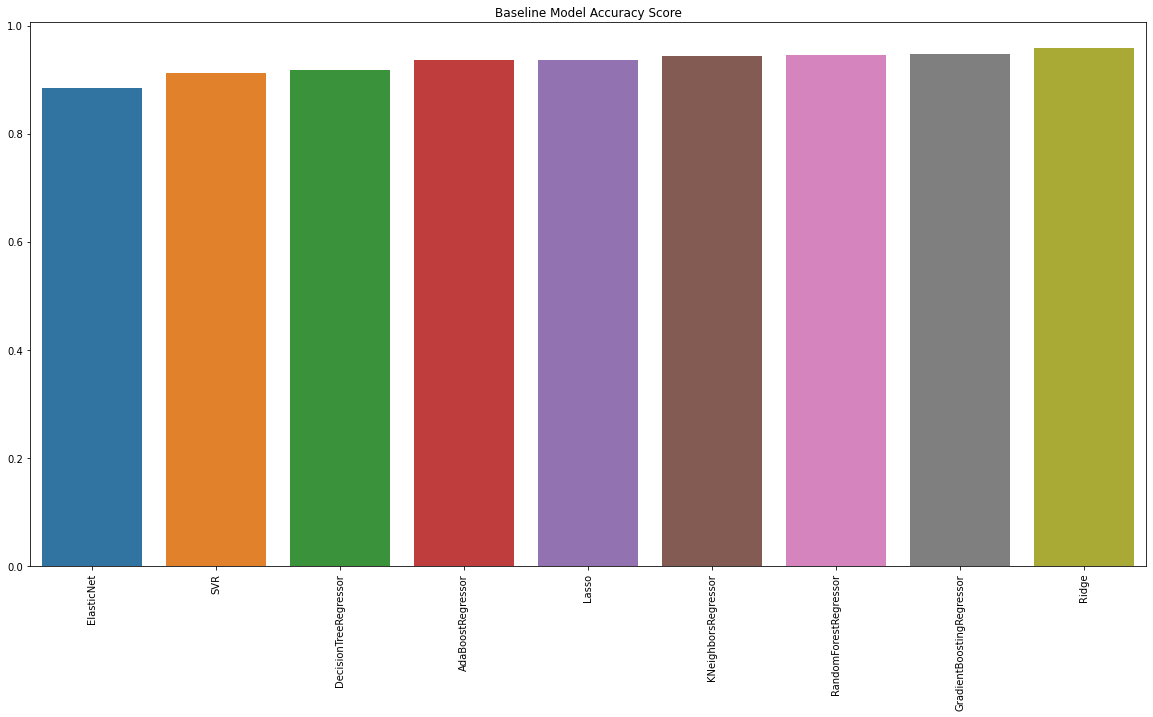

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores_df.T)
plt.title('Baseline Model Accuracy Score')
plt.xticks(rotation=90);

With the scoring of the baseline model, we will use the following models to tune the hyperparameter:

    1. KNeighborsRegressor 	0.942739
    2. RandomForestRegressor 	0.945066
    3. GradientBoostingRegressor 	0.948113
    4. Ridge 	0.957755

## Hyperparameter Tuning via Grid Search CV

In [36]:
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings

In [37]:
filterwarnings('ignore')

In [38]:
def gridsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_gs_scores = {}
    model_gs_best_param = {}
    
    for name, model in models.items():
        gs_model = GridSearchCV(model,
                                param_grid=params[name],
                                scoring='neg_mean_squared_error',
                                n_jobs=-1,
                                cv=5,
                                verbose=2)
        
        gs_model.fit(X_train,y_train)

        model_gs_scores[name] = gs_model.score(X_test,y_test)
        model_gs_best_param[name] = gs_model.best_params_

    model_gs_scores = pd.DataFrame(model_gs_scores, index=['neg_mean_squared_error'])
    model_gs_scores = model_gs_scores.transpose().sort_values('neg_mean_squared_error')
        
    return model_gs_scores, model_gs_best_param

### Grid Search CV model 1

In [39]:
models = {'Ridge' : Ridge(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor()}
         
params = {'Ridge' : {'alpha' : np.linspace(0,1,20),
                     'normalize': [True, False]},
          'KNeighborsRegressor': {'n_neighbors':[1,2,5,10,20]},
          'RandomForestRegressor': {'n_estimators' : [50,100,200],
                    'criterion' : ['mse','mae'],
                    'oob_score' : [True,False]},
          'GradientBoostingRegressor': {'criterion': ['mse', 'friedman_mse'],
                                        'loss': ['ls','lad','huber','quantile']}
          }

In [40]:
model_gs_scores_1, model_gs_best_param_1 = gridsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [41]:
model_gs_scores_1

,neg_mean_squared_error
KNeighborsRegressor,-11.040187
RandomForestRegressor,-10.332228
GradientBoostingRegressor,-10.059738
Ridge,-8.229503


In [42]:
model_gs_best_param_1

{'Ridge': {'alpha': 0.0, 'normalize': True},
 'KNeighborsRegressor': {'n_neighbors': 5},
 'RandomForestRegressor': {'criterion': 'mae',
  'n_estimators': 200,
  'oob_score': False},
 'GradientBoostingRegressor': {'criterion': 'friedman_mse', 'loss': 'ls'}}

### Grid Search CV model 2

In [43]:
# models = {'Ridge' : Ridge(),
#          'KNeighborsRegressor': KNeighborsRegressor(),
#          'RandomForestRegressor':RandomForestRegressor(),
#          'GradientBoostingRegressor': GradientBoostingRegressor()}
         
# params = {'Ridge' : {'alpha' : np.linspace(0.5,1,20),
#                      'normalize': [False]},
#           'KNeighborsRegressor': {'n_neighbors':[4,5,6,7]},
#           'RandomForestRegressor': {'n_estimators' : [150,200,300],
#                     'criterion' : ['mse'],
#                     'oob_score' : [False]},
#           'GradientBoostingRegressor': {'criterion': ['mse'],
#                                         'loss': ['ls'],
#                                         'n_estimators' : [150,200,300]}
#           }

In [44]:
# model_gs_scores_2, model_gs_best_param_2 = gridsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [45]:
# model_gs_scores_2

,neg_mean_squared_error
KNeighborsRegressor,-11.040187
RandomForestRegressor,-10.666810
GradientBoostingRegressor,-9.993747
Ridge,-8.194713


In [46]:
# model_gs_best_param_2

{'Ridge': {'alpha': 1.0, 'normalize': False},
 'KNeighborsRegressor': {'n_neighbors': 5},
 'RandomForestRegressor': {'criterion': 'mse',
  'n_estimators': 200,
  'oob_score': False},
 'GradientBoostingRegressor': {'criterion': 'mse',
  'loss': 'ls',
  'n_estimators': 300}}

From the Grid Search CV using the neg mean squared error, we can see that the Ridge model is performing the best with a result of 8.194713.

# 6. Model Evaluation

In [47]:
model = Ridge(alpha=1.0,normalize=False)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
r2 = r2_score(y_test,y_preds)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [50]:
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.957754777599356
Mean Absolute Error: 2.2527079714433427
Mean Square Error: 8.19471338944093
Root Mean Square Error: 2.8626409815834277


Using a Ridge Model we have evaulated the model of a Root Mean Square Error of 2.8626409815834273, a R2 Score of 0.957754777599356 and a Mean Absolute Error: 2.2527079714433427